# **Rossmann Store Sales: Exploratory Data Analysis (Task 1)**


### **Introduction**
A brief overview of the notebook:
- Objective: Exploring customer purchasing behavior in Rossmann stores using various features like promotions, holidays, and store types.
- Steps: Data cleaning, EDA, and insights through visualizations.





### **Import Libraries**

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


import missingno as msno
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Date and time
from datetime import datetime

# Warnings and logging
import warnings
import logging
warnings.filterwarnings("ignore")


# Set up logger
logging.basicConfig(filename="../logs/eda.log", level=logging.INFO)


In [5]:
# Load datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
store = pd.read_csv('../data/store.csv')

### **Load the Data**
- Load the store datasets.

In [6]:
# File path
file_path = '../data/store.csv'

# Load the dataset
store_data = pd.read_csv(file_path)

# Check the first few rows of the dataset
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Data Overview

In [7]:
# Data overview
def data_overview(df):
    print(f"Dataset Shape: {df.shape}")
    print(f"Columns: {df.columns}")
    print(df.info())
    print(df.describe())

data_overview(store_data)


Dataset Shape: (1115, 10)
Columns: Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterva

### **Data Cleaning**

#### Handle Missing Values
- Check for missing data and handle accordingly.

Missing Values:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


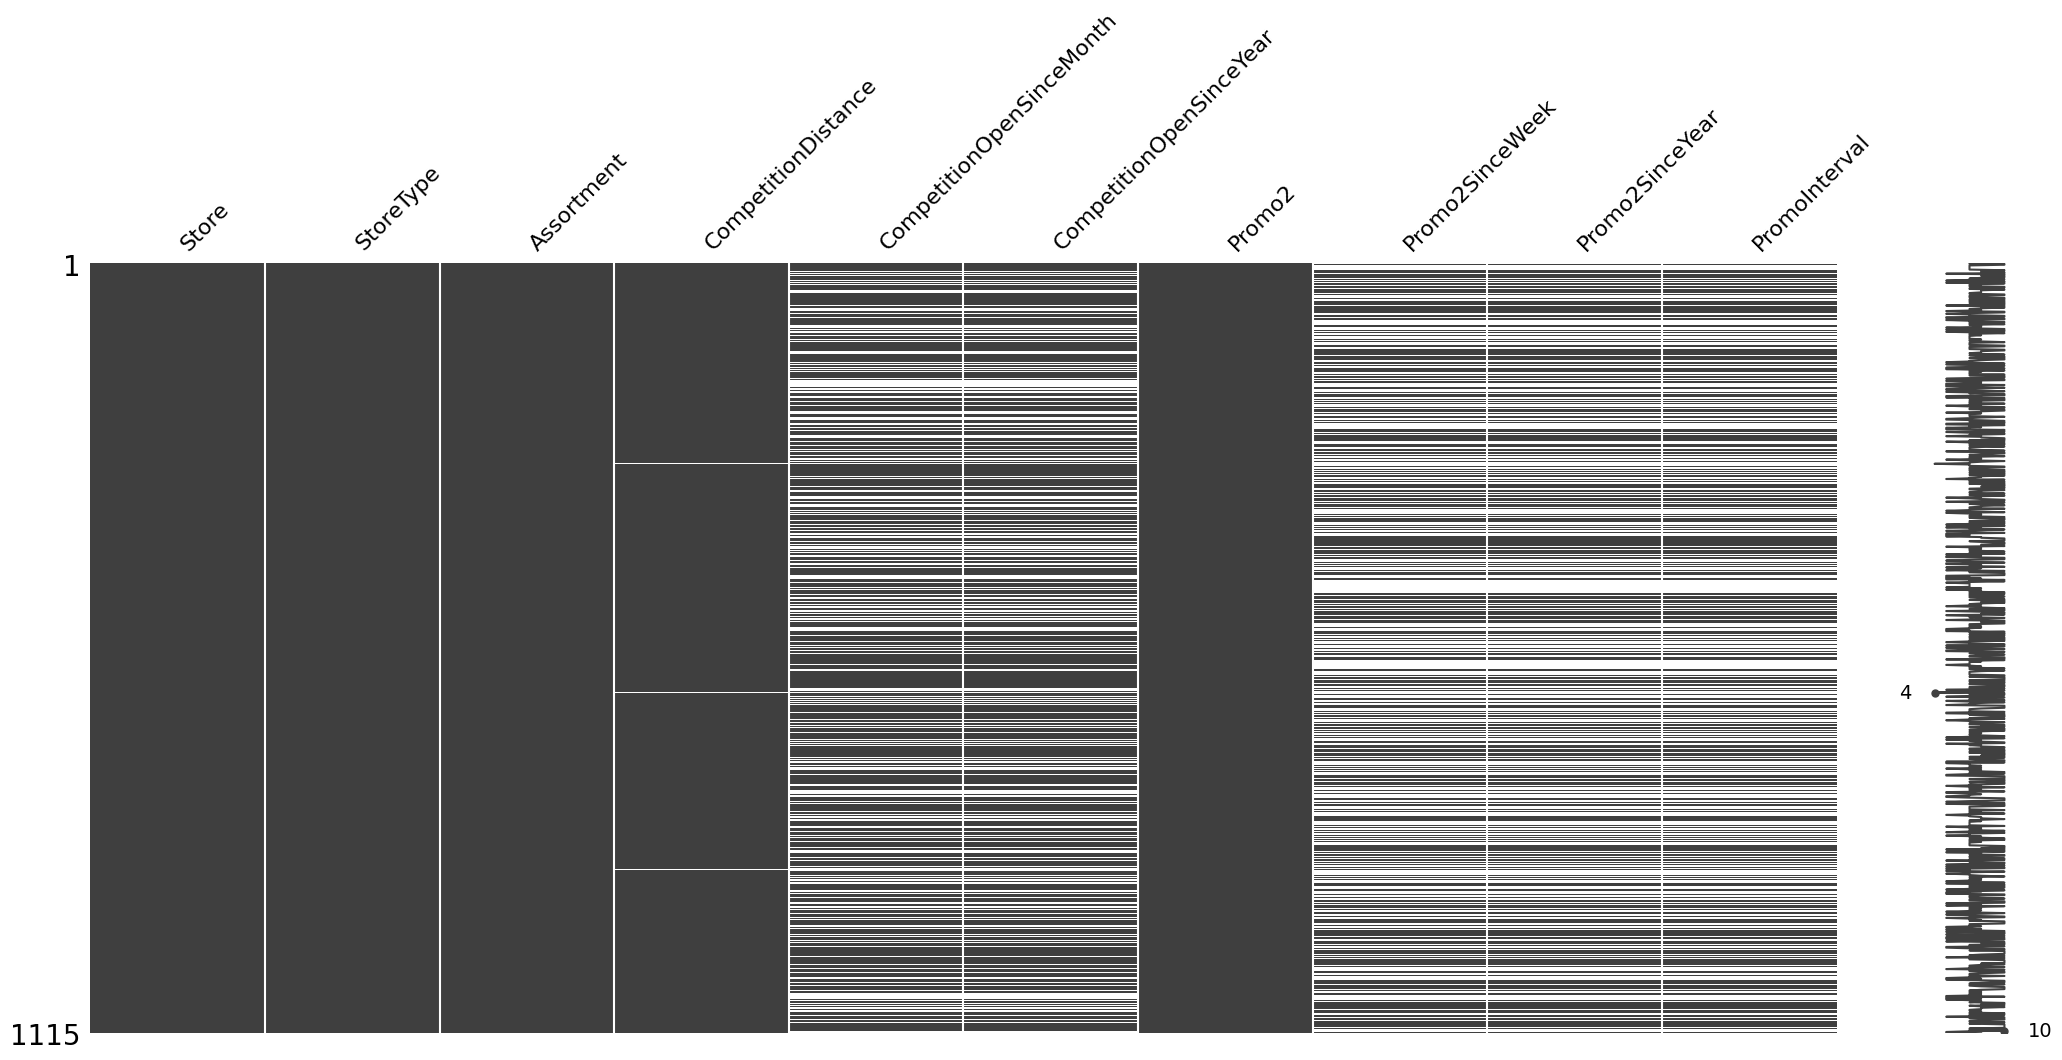

In [8]:
# Check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print(f"Missing Values:\n{missing_values}")
    msno.matrix(df)
    plt.show()

check_missing_values(store_data)


Missing Values:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


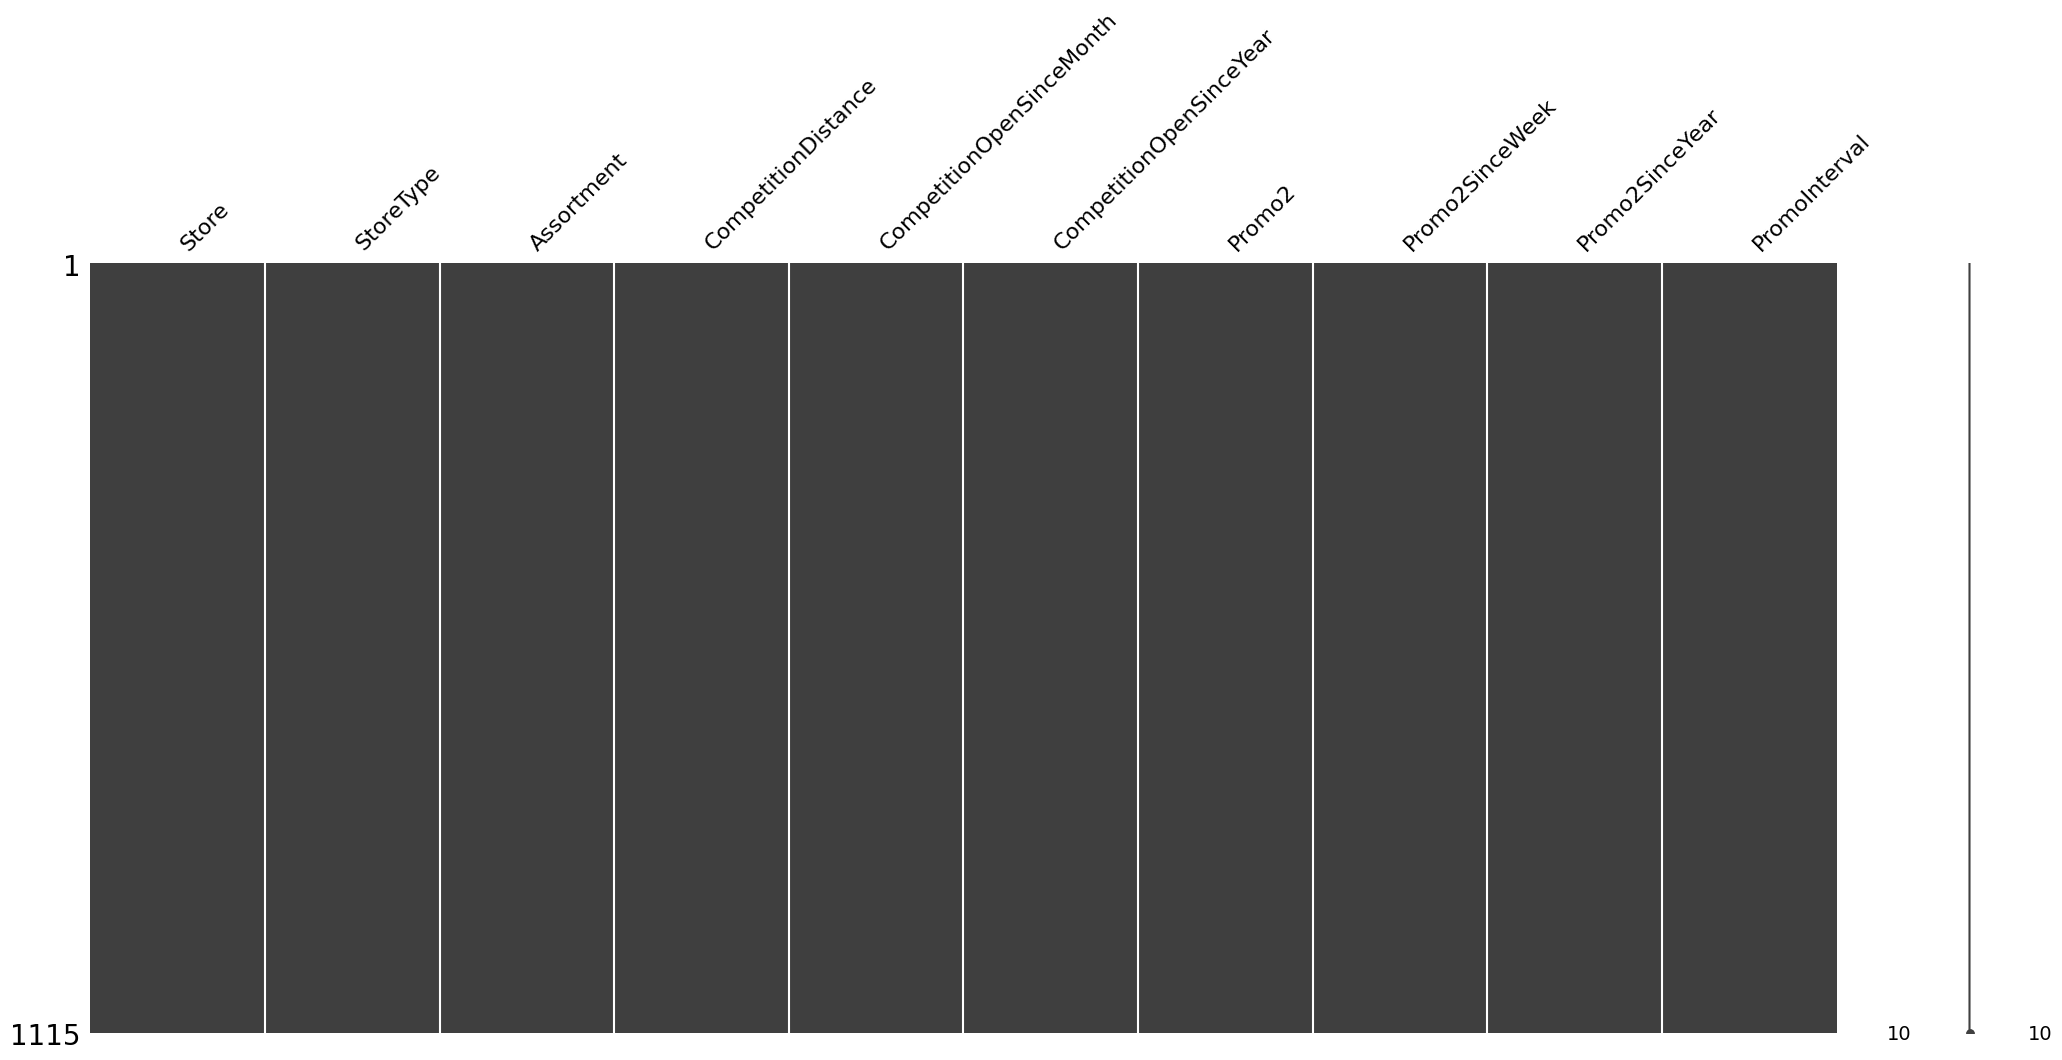

In [9]:
# Handling missing values
def handle_missing_values(df):
    # Fill missing 'CompetitionDistance' with the median
    df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
    
    # Fill missing 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with mode
    df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
    df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace=True)
    
    # Fill missing 'Promo2SinceWeek' and 'Promo2SinceYear' with mode
    df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].mode()[0], inplace=True)
    df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].mode()[0], inplace=True)
    
    # Fill missing 'PromoInterval' with 'None'
    df['PromoInterval'].fillna('None', inplace=True)

handle_missing_values(store_data)
check_missing_values(store_data)

In [10]:
# Fill missing 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with default values
store_data['CompetitionOpenSinceMonth'].fillna(1, inplace=True)
store_data['CompetitionOpenSinceYear'].fillna(2000, inplace=True)

# Convert 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' into a single datetime column
store_data['CompetitionOpenSince'] = pd.to_datetime(
    store_data['CompetitionOpenSinceYear'].astype(int).astype(str) + '-' + store_data['CompetitionOpenSinceMonth'].astype(int).astype(str) + '-01',
    errors='coerce'
)

# Fill missing 'Promo2SinceWeek' and 'Promo2SinceYear' with default values
store_data['Promo2SinceWeek'].fillna(1, inplace=True)
store_data['Promo2SinceYear'].fillna(2000, inplace=True) 

# Convert 'Promo2SinceYear' and 'Promo2SinceWeek' to a datetime format
store_data['Promo2Since'] = pd.to_datetime(
    store_data['Promo2SinceYear'].astype(int).astype(str) + '-W' + store_data['Promo2SinceWeek'].astype(int).astype(str) + '-1',
    errors='coerce'
)

# Check the data after conversion
store_data[['CompetitionOpenSince', 'Promo2Since']].head()


,CompetitionOpenSince,Promo2Since
0,2008-09-01,NaT
1,2007-11-01,NaT
2,2006-12-01,NaT
3,2009-09-01,NaT
4,2015-04-01,NaT


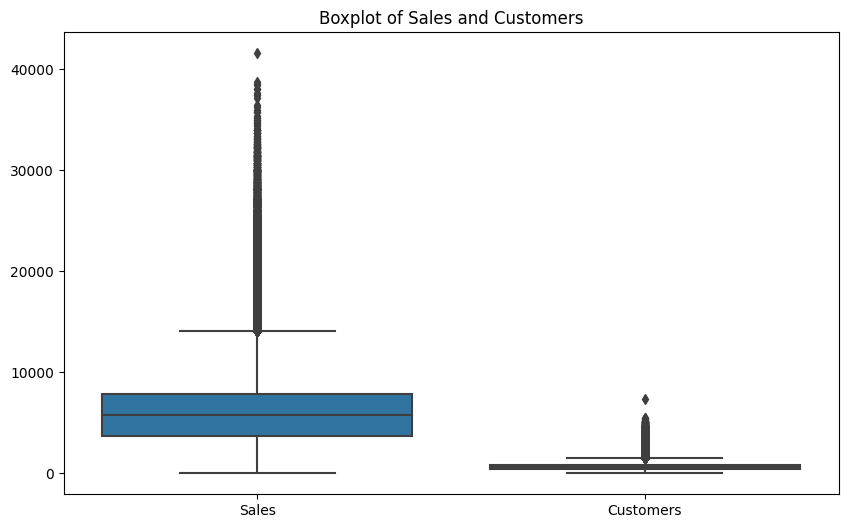

In [11]:
# Visualize outliers in sales and customer count
plt.figure(figsize=(10, 6))
sns.boxplot(data=train[['Sales', 'Customers']])
plt.title("Boxplot of Sales and Customers")
plt.show()

### **Exploratory Data Analysis (EDA)**

#### Check Distribution of Features
- Visualize distribution of key features and compare between training and test sets.

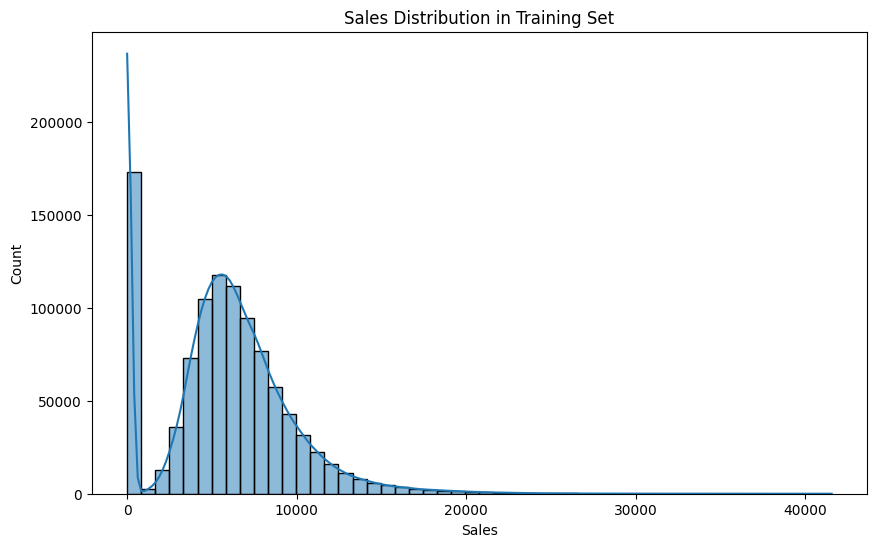

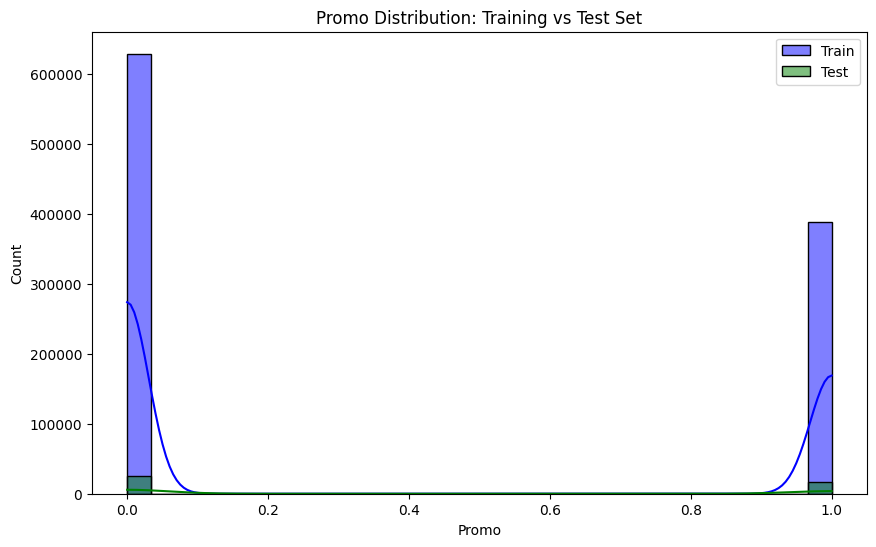

In [12]:
# Plotting sales distribution in training set
plt.figure(figsize=(10, 6))
sns.histplot(train['Sales'], kde=True, bins=50)
plt.title('Sales Distribution in Training Set')
plt.show()

# Compare promo distribution in training and test set
plt.figure(figsize=(10, 6))
sns.histplot(train['Promo'], color='blue', label='Train', kde=True, bins=30)
sns.histplot(test['Promo'], color='green', label='Test', kde=True, bins=30)
plt.title('Promo Distribution: Training vs Test Set')
plt.legend()
plt.show()

#### Distribution of the stores based on StoreType

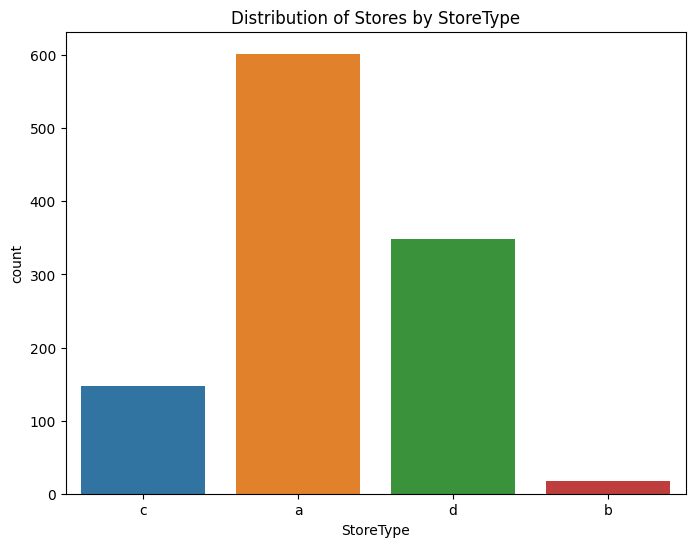

In [13]:
# Distribution of the stores based on StoreType
plt.figure(figsize=(8, 6))
sns.countplot(x='StoreType', data=store_data)
plt.title("Distribution of Stores by StoreType")
plt.show()

#### Distribution of the stores based on Assortment type

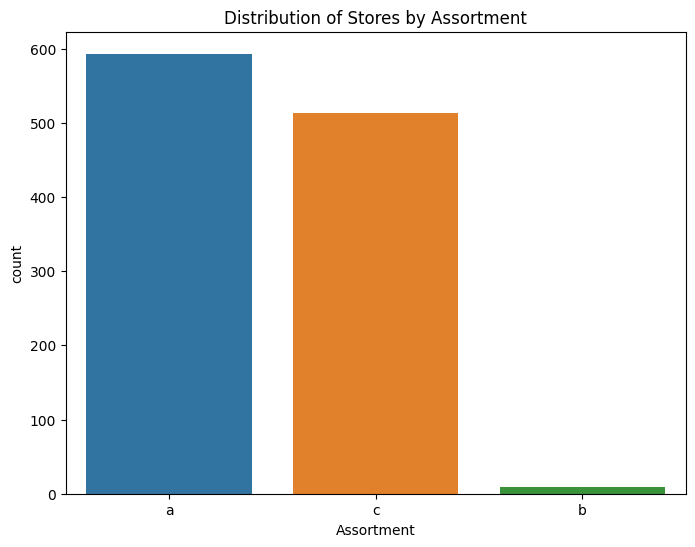

In [14]:
# Distribution of the stores based on Assortment type
plt.figure(figsize=(8, 6))
sns.countplot(x='Assortment', data=store_data)
plt.title("Distribution of Stores by Assortment")
plt.show()

#### Distribution of store on CompetitionDistance

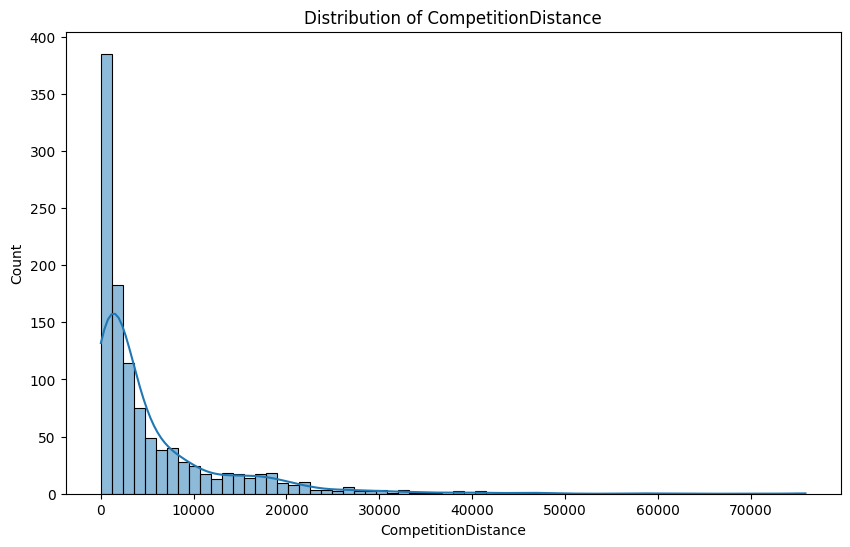

In [15]:
# Check the distribution of CompetitionDistance
plt.figure(figsize=(10, 6))
sns.histplot(store_data['CompetitionDistance'], kde=True)
plt.title('Distribution of CompetitionDistance')
plt.show()

#### 6.2. Sales Behavior During Holidays
- Analyze sales before, during, and after holidays.

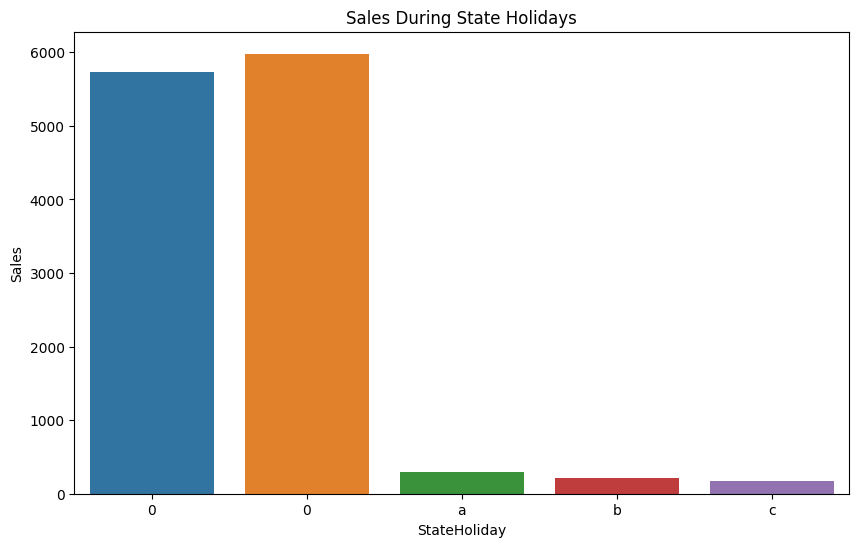

In [16]:
# Group by holidays and calculate average sales
holiday_sales = train.groupby('StateHoliday')['Sales'].mean().reset_index()

# Plotting sales before, during, and after holidays
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales)
plt.title('Sales During State Holidays')
plt.show()

#### 6.3. Seasonal Purchasing Trends
- Identify seasonal patterns, such as Christmas or Easter sales peaks.


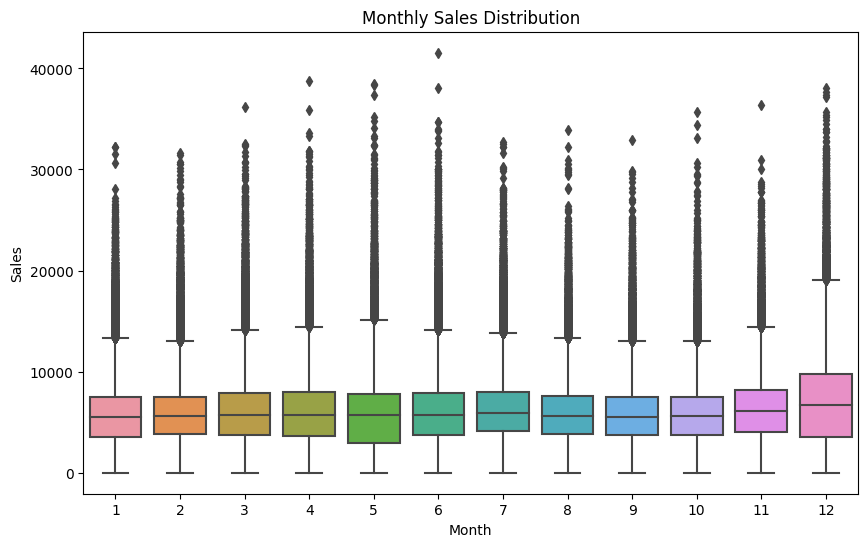

In [17]:
# Extracting month from date
train['Month'] = pd.to_datetime(train['Date']).dt.month

# Visualizing seasonal sales trends
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Sales', data=train)
plt.title('Monthly Sales Distribution')
plt.show()

#### 6.4. Correlation Between Sales and Customers
- Investigate the correlation between `Sales` and `Customers`.

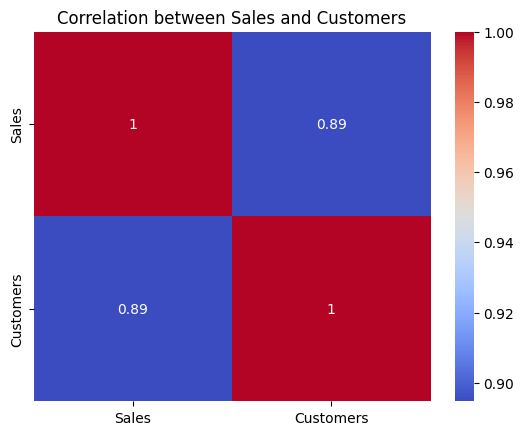

In [20]:
# Correlation analysis
correlation = train[['Sales', 'Customers']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Customers')
plt.show()

### Correlation between all columns

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Convert 'StoreType', 'Assortment', and 'PromoInterval' from strings to numeric codes
store_data['StoreType'] = label_encoder.fit_transform(store_data['StoreType'])
store_data['Assortment'] = label_encoder.fit_transform(store_data['Assortment'])

# For 'PromoInterval', first replace missing values with 'None', then apply label encoding
store_data['PromoInterval'].fillna('None', inplace=True)
store_data['PromoInterval'] = label_encoder.fit_transform(store_data['PromoInterval'])

# Now check the correlation
correlation_matrix = store_data.corr()

# Display correlation matrix
correlation_matrix


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since
Store,1.000000,-0.020977,0.003913,-0.027325,-0.038123,-0.001570,0.007486,0.008178,0.029668,-0.011256,-0.003157,NaN
StoreType,-0.020977,1.000000,0.234372,0.079396,0.038731,0.045918,0.086597,0.022939,-0.024305,-0.070205,0.047378,NaN
Assortment,0.003913,0.234372,1.000000,0.144890,0.037398,0.091546,-0.000057,-0.053155,0.031808,0.030929,0.092811,NaN
CompetitionDistance,-0.027325,0.079396,0.144890,1.000000,-0.047199,0.019890,-0.145098,-0.089109,-0.096428,0.130435,0.017833,NaN
CompetitionOpenSinceMonth,-0.038123,0.038731,0.037398,-0.047199,1.000000,0.062675,0.019285,0.012050,0.011632,-0.022730,0.104531,NaN
CompetitionOpenSinceYear,-0.001570,0.045918,0.091546,0.019890,0.062675,1.000000,-0.023852,-0.027471,-0.028571,0.017233,0.999118,NaN
Promo2,0.007486,0.086597,-0.000057,-0.145098,0.019285,-0.023852,1.000000,0.428576,0.303660,-0.912003,-0.022962,NaN
Promo2SinceWeek,0.008178,0.022939,-0.053155,-0.089109,0.012050,-0.027471,0.428576,1.000000,-0.057221,-0.405449,-0.026859,NaN
Promo2SinceYear,0.029668,-0.024305,0.031808,-0.096428,0.011632,-0.028571,0.303660,-0.057221,1.000000,-0.221902,-0.027998,NaN
PromoInterval,-0.011256,-0.070205,0.030929,0.130435,-0.022730,0.017233,-0.912003,-0.405449,-0.221902,1.000000,0.016222,NaN


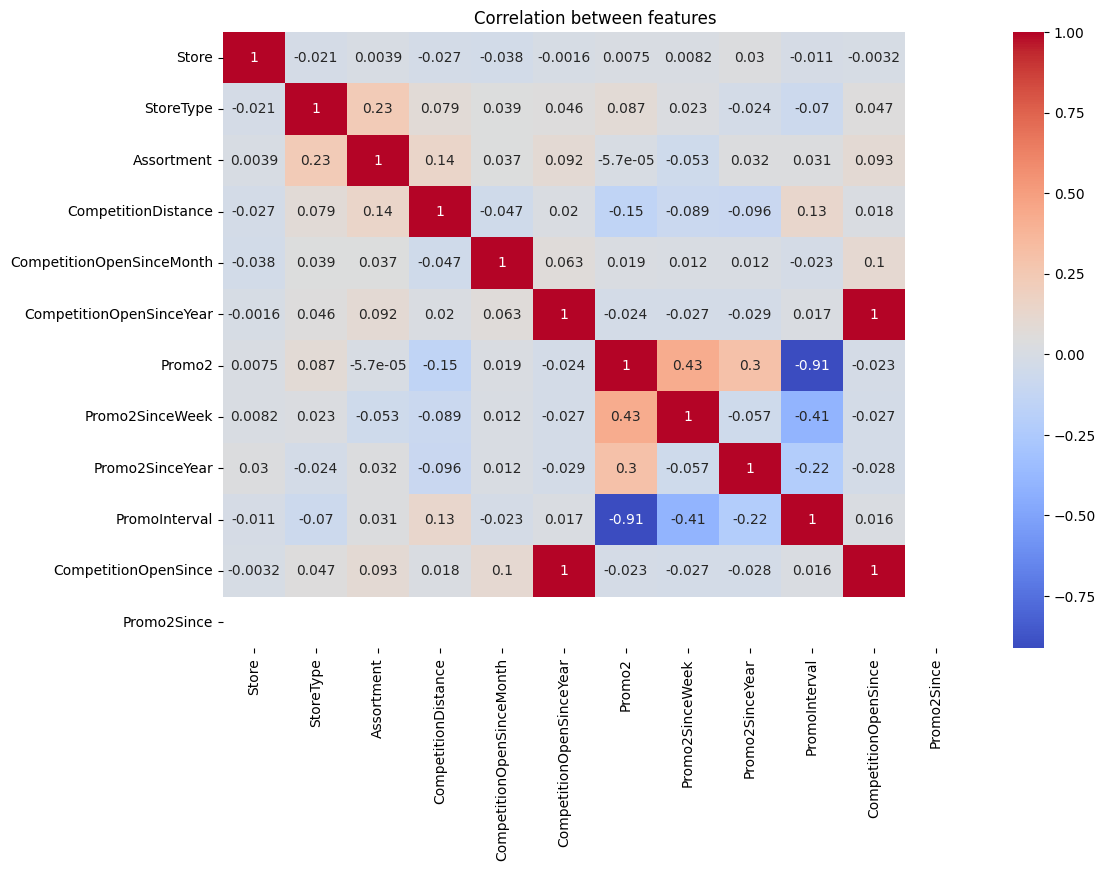

In [19]:
# Correlation analysis between features
plt.figure(figsize=(12, 8))
sns.heatmap(store_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between features")
plt.show()

#### Promo Effect on Sales
- Analyze how promos impact sales and customer behavior.

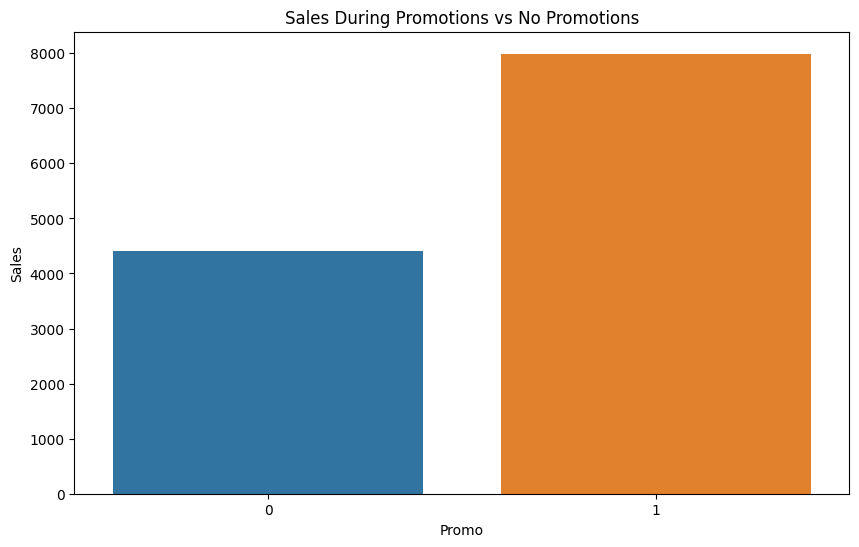

In [21]:
# Sales during promo vs no promo
promo_sales = train.groupby('Promo')['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.title('Sales During Promotions vs No Promotions')
plt.show()

In [22]:
# Analyze the effect of promos on sales
def promo_analysis(df):
    promo_data = df.groupby('Promo2').mean()['CompetitionDistance']
    print(f"Average CompetitionDistance with Promo2: \n{promo_data}")

promo_analysis(store_data)


Average CompetitionDistance with Promo2: 
Promo2
0    6533.988971
1    4313.021016
Name: CompetitionDistance, dtype: float64


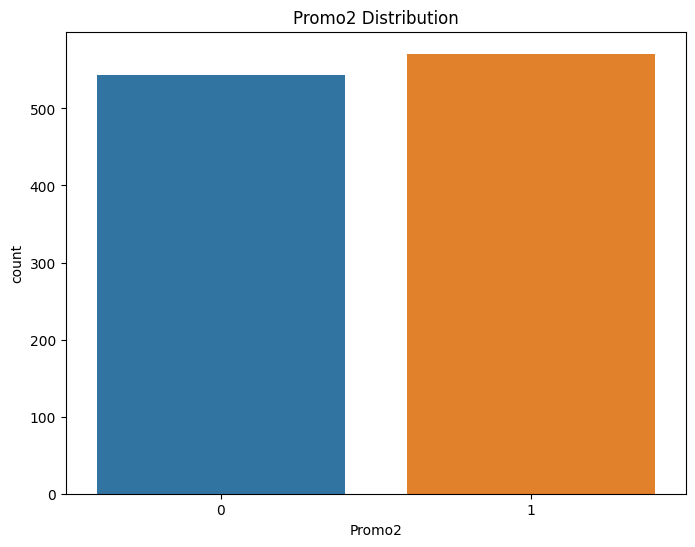

In [23]:
# Promo2 distribution analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Promo2', data=store_data)
plt.title("Promo2 Distribution")
plt.show()

#### 6.6. Assortment Type Effect on Sales
- Check the impact of different store assortments on sales.

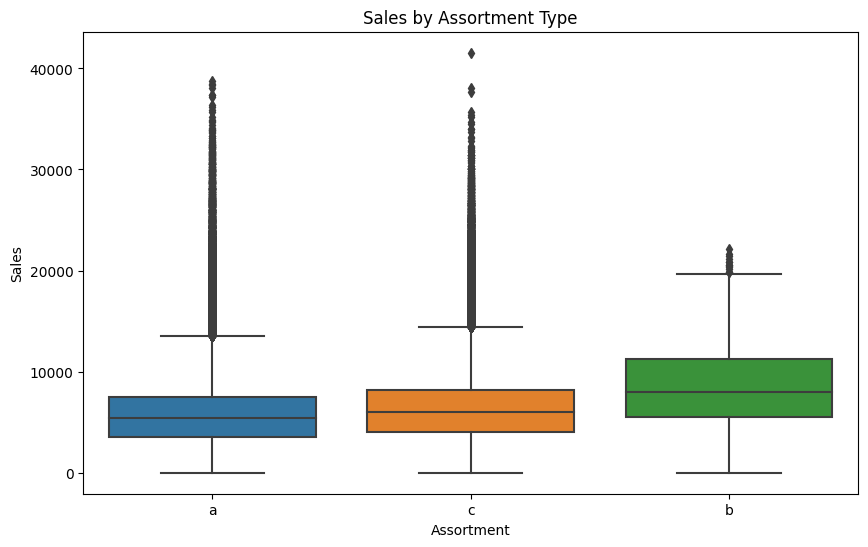

In [24]:
# Average sales by assortment type
assortment_sales = train.merge(store, on='Store')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='Sales', data=assortment_sales)
plt.title('Sales by Assortment Type')
plt.show()

In [25]:
# Assortment effect on store behavior
def assortment_sales_analysis(df):
    assortment_sales = df.groupby('Assortment').mean()['CompetitionDistance']
    print(f"Average CompetitionDistance for Assortment types: \n{assortment_sales}")

assortment_sales_analysis(store_data)


Average CompetitionDistance for Assortment types: 
Assortment
0    4393.338954
1    1177.777778
2    6630.360624
Name: CompetitionDistance, dtype: float64


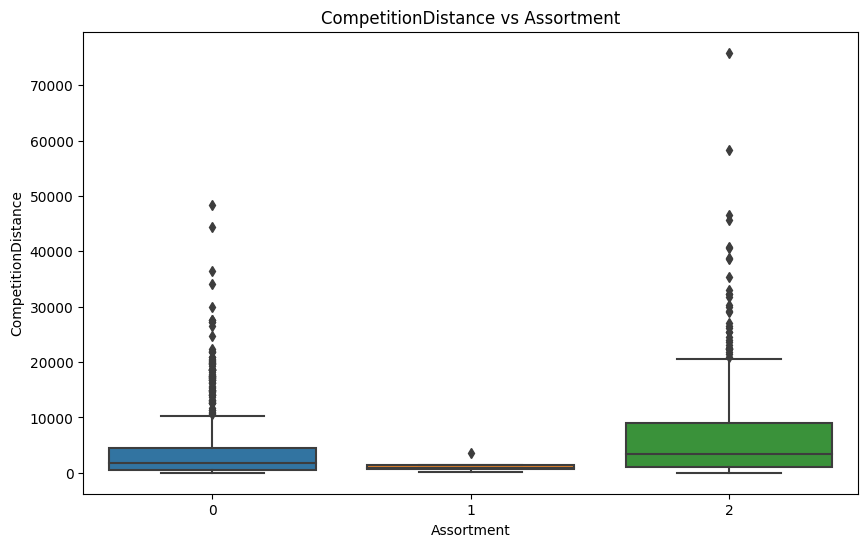

In [26]:
# Explore the impact of assortment type on CompetitionDistance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='CompetitionDistance', data=store_data)
plt.title('CompetitionDistance vs Assortment')
plt.show()

#### 6.7. Competitor Distance Effect on Sales
- Explore how the distance to competitors affects sales.


In [27]:
# Effect of Competition on stores
def competition_effect(df):
    df['HasCompetition'] = df['CompetitionDistance'].apply(lambda x: 1 if x > 0 else 0)
    comp_effect = df.groupby('HasCompetition').mean()['CompetitionDistance']
    print(f"Effect of having competition on stores: \n{comp_effect}")

competition_effect(store_data)


Effect of having competition on stores: 
HasCompetition
1    5396.61435
Name: CompetitionDistance, dtype: float64


In [28]:
# Analyze how competitor distance affects stores in city centers
def city_center_analysis(df):
    df['IsCityCenter'] = df['CompetitionDistance'].apply(lambda x: 1 if x <= 500 else 0)
    city_center_stores = df.groupby('IsCityCenter').mean()['CompetitionDistance']
    print(f"Effect of being in city center on stores: \n{city_center_stores}")

city_center_analysis(store_data)


Effect of being in city center on stores: 
IsCityCenter
0    6662.810056
1     245.500000
Name: CompetitionDistance, dtype: float64


In [29]:
# Conclusion
logging.info("Exploratory data analysis completed for Task-1. Insights and visualizations generated.")
